In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
#  loading data sets
insurance__dataset=pd.read_csv(r"file:///C:\Users\ADMIN\Downloads\archive%20(4)\insurance.csv")

In [3]:
insurance__dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#rows and columuns
insurance__dataset.shape

(1338, 7)

In [5]:
#information about dataset
insurance__dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### categorical columns:
      sex
      smoker
      region 
      

In [6]:
#missing value
insurance__dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#stastical measure of dataset
insurance__dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


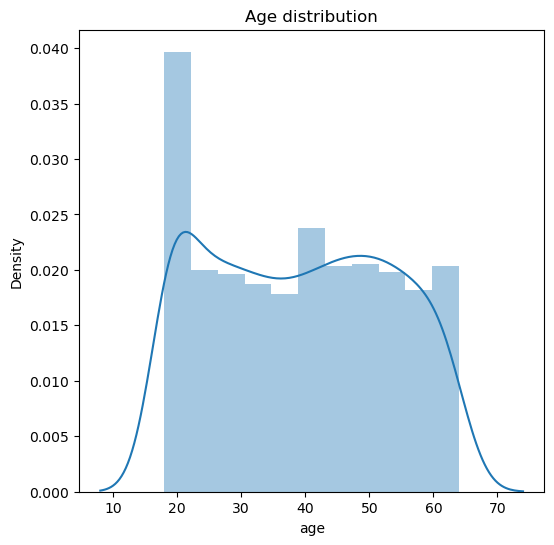

In [8]:
#distrubution of Age value
plt.figure(figsize=(6,6))
sns.distplot(insurance__dataset["age"])
plt.title("Age distribution")
plt.show()

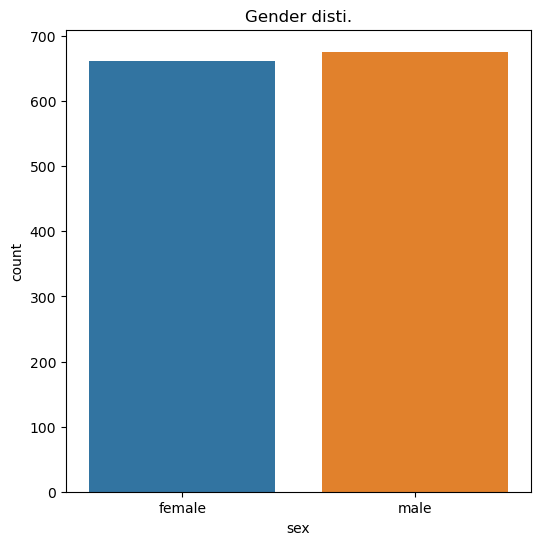

In [9]:
#Sex (Gender columns)
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=insurance__dataset)
plt.title("Gender disti.")
plt.show()

In [10]:
insurance__dataset["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

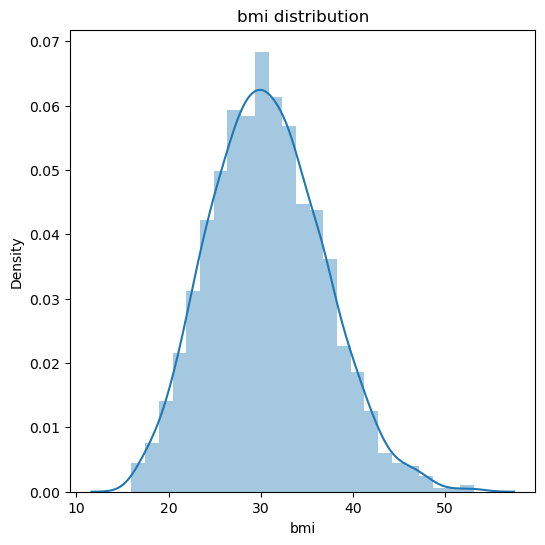

In [11]:
plt.figure(figsize=(6,6))
sns.distplot(insurance__dataset["bmi"])
plt.title("bmi distribution")
plt.show()

bmi normal range ---> 18.5 to  24.9

under weight less than 18.5
over weight grater than 24.9


#distribution children

In [13]:
insurance__dataset.value_counts("children")

children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64

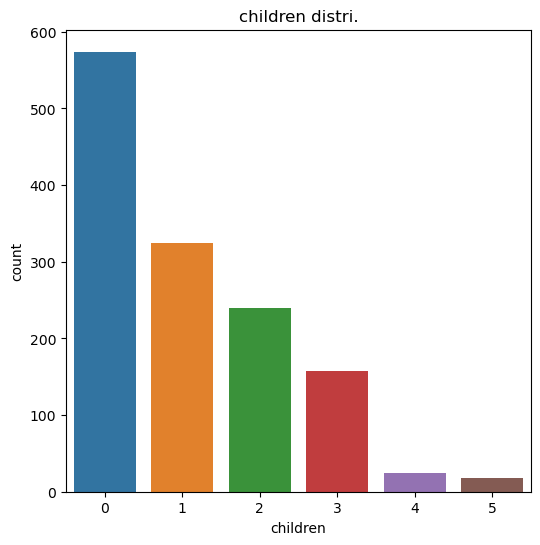

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x="children",data=insurance__dataset)
plt.title("children distri.")
plt.show()

0 = persons have no children
1 = one children
2 = two children
....

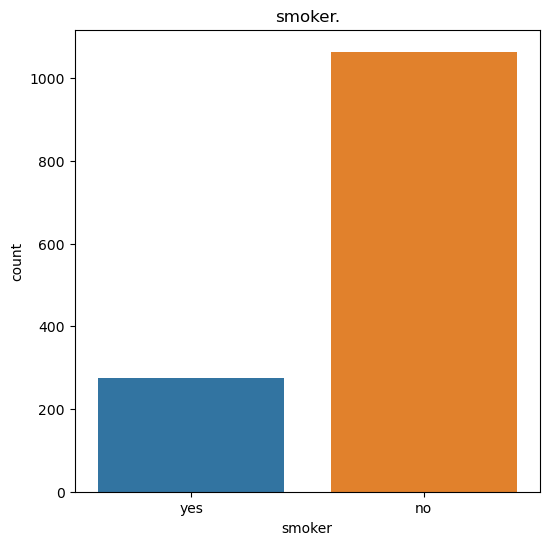

In [15]:
#smoker 
plt.figure(figsize=(6,6))
sns.countplot(x="smoker",data=insurance__dataset)
plt.title("smoker.")
plt.show()

In [16]:
insurance__dataset.value_counts("smoker")

smoker
no     1064
yes     274
dtype: int64

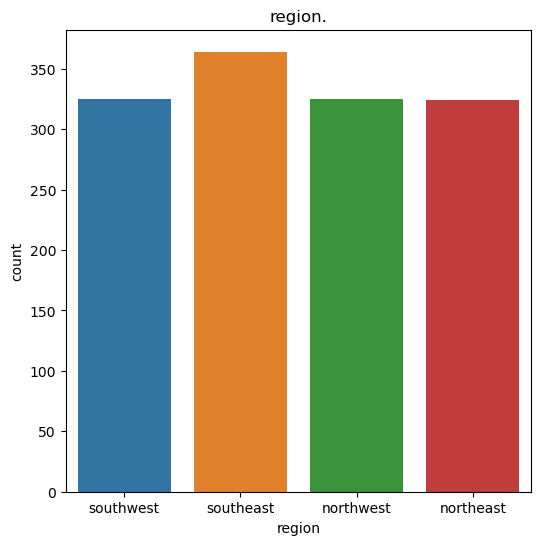

In [17]:
#region
plt.figure(figsize=(6,6))
sns.countplot(x="region",data=insurance__dataset)
plt.title("region.")
plt.show()

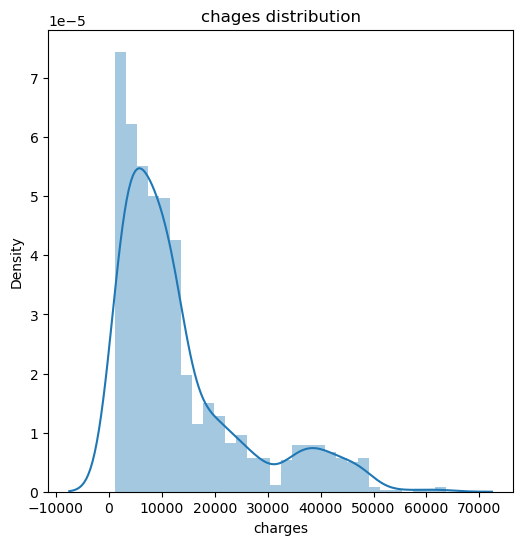

In [18]:
#charges 
plt.figure(figsize=(6,6))
sns.distplot(insurance__dataset["charges"])
plt.title("chages distribution")
plt.show()

#### Data pre-processing

#### Encoding the categorical features

In [20]:
# encoding sex column
insurance__dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

 # encoding 'smoker' column
insurance__dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance__dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

#### Splitting the Features and Target

In [21]:
X = insurance__dataset.drop(columns='charges', axis=1)
Y = insurance__dataset['charges']

In [23]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [24]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


#### Model Training

Linear Regression

In [27]:
# loading the Linear Regression model
LR = LinearRegression()

In [28]:
LR.fit(X_train, Y_train)

LinearRegression()

#### Model Evaluation

In [29]:
# prediction on training data
training_data_prediction =LR.predict(X_train)

In [30]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [32]:
# prediction on test data
test_data_prediction =LR.predict(X_test)

In [33]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


#### Building a Predictive System

In [38]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = LR.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.0805764960496
